In [3]:
from skimage import img_as_ubyte, img_as_float, img_as_bool
from skimage.io import imread, imsave, imshow, show, imshow_collection, imread_collection
from skimage import morphology
import numpy as np

#### Question 1a

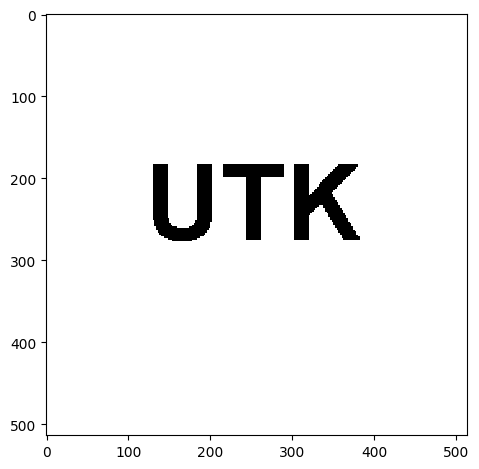

In [4]:
f_utk = imread("data/labF_images/UTK.tif")
imshow(img_as_float(f_utk))                       # Cannot display boolan array as image 

In [5]:
f_se1 = np.ones([3,3])

g_img = f_utk
for i in range(3):
    g_img = morphology.binary_erosion(g_img,f_se1)

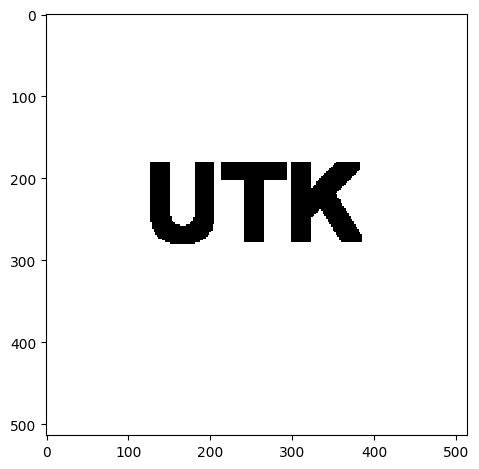

In [6]:
imshow(img_as_float(g_img))

In this image the text is the background of the image (Boolean false/0). Therefore erosion increases the size of the front as the foreground pixels are reduced

#### Question 1b

In [7]:
h_img = f_utk
for i in range(3):
    h_img = morphology.dilation(h_img,f_se1)

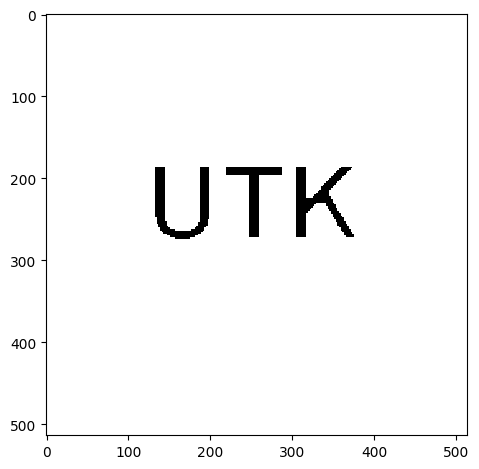

In [8]:
imshow(img_as_float(h_img))

#### Question 1c

In [9]:
f_se2 = np.ones([7,7])
j_img = morphology.binary_erosion(f_utk,f_se2)

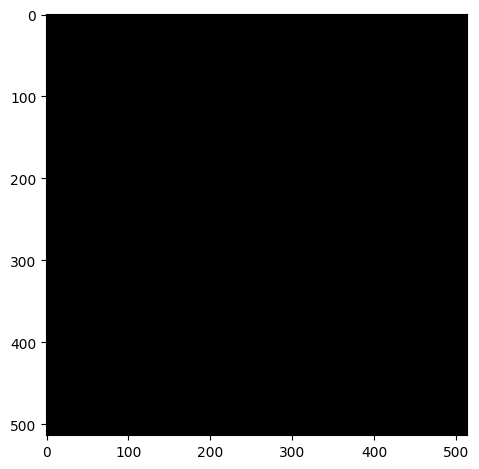

In [10]:
imshow(img_as_float(j_img)-img_as_float(g_img), cmap='gray')

The 3x3 SE removes one layer of pixels at a time as it retains the origin pixel of the SE when it is fully contained in the foreground of the image. After three passes there have been 3 layers removed. Therefore the 7x7 SE works in one pass as it removes 3 pixels at a time when the SE is fully contained in the foreground

#### Question 1d

In [11]:
f_utk_c = img_as_bool(1-img_as_float(f_utk))

In [12]:
f_se3 = np.ones([9,9])
g_utk_c = morphology.binary_erosion(f_utk_c,f_se3)

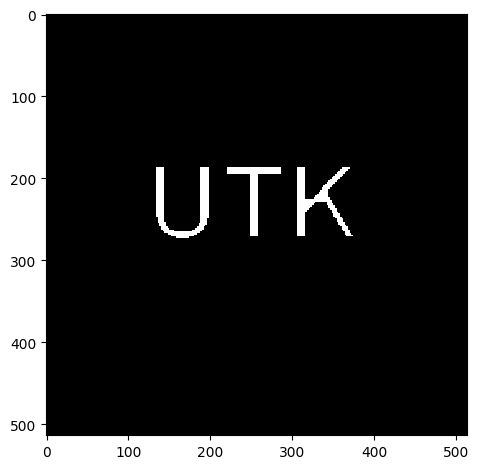

In [13]:
imshow(img_as_float(g_utk_c))

In the complement of the image - the text is now the foreground. This means that the erosion reduces the thickness of the text. 

#### Question 2a

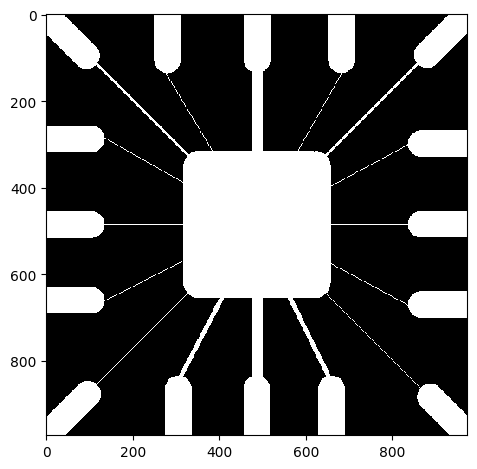

In [14]:
f_mask = imread("data/labF_images/circuitmask.tif")
imshow(img_as_float(f_mask))

In [15]:
f_se4 = np.ones([13,13])
g_mask = morphology.binary_opening(f_mask,f_se4)

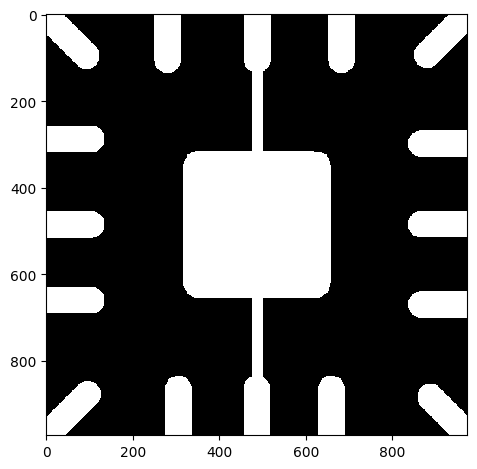

In [16]:
imshow(img_as_float(g_mask))

#### Question 2a

In [17]:
f_se5 = np.ones([11,11])
h_mask = morphology.binary_erosion(f_mask,f_se5)

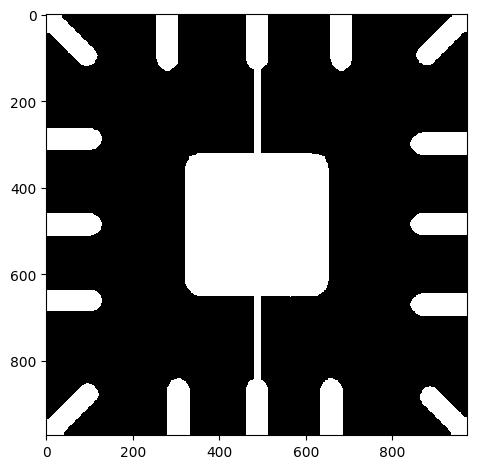

In [18]:
imshow(img_as_float(h_mask))

The difference between opening and erosion is that the size of the shapes is preserved when opening.

#### Question 3a

In [19]:
f_left = img_as_bool(imread('data/labF_images/left.tif'))

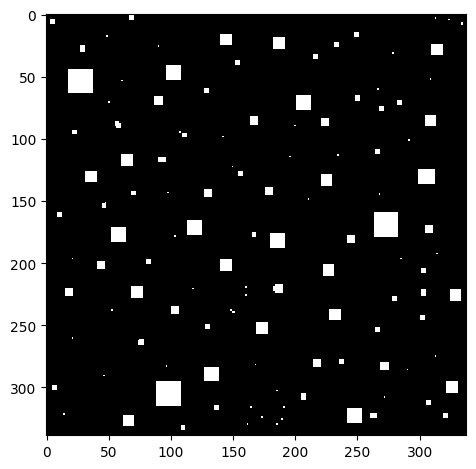

In [20]:
imshow(img_as_float(f_left))

In [21]:
f_se6 = np.ones([13,13])
g_left = morphology.opening(f_left,f_se6)

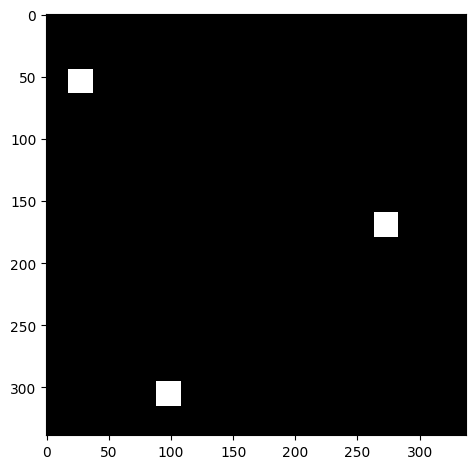

In [22]:
imshow(img_as_float(g_left))

#### Question 4

In [23]:
f_shep = imread('data/labF_images/shepp-logan-phantom.tif')

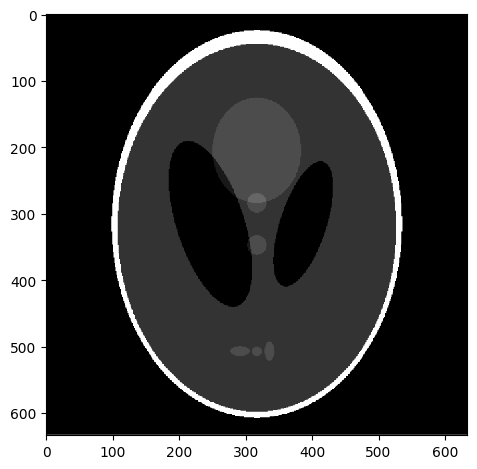

In [24]:
imshow(f_shep)

In [25]:
f_se7 = np.ones([51,51])
g_shep = morphology.closing(f_shep,f_se7)

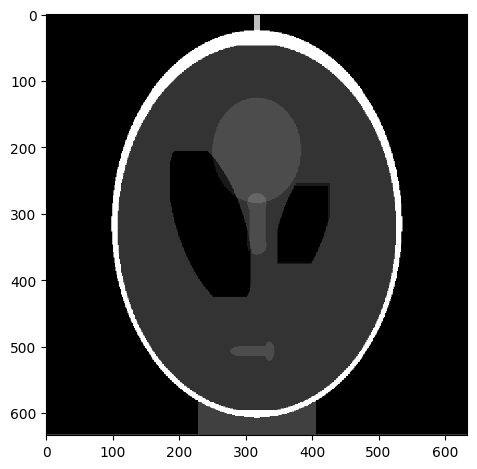

In [26]:
imshow(img_as_float(g_shep,f_se7))

#### Question 5

In [27]:
f_skel = imread('data/labF_images/leg_bone.tif')

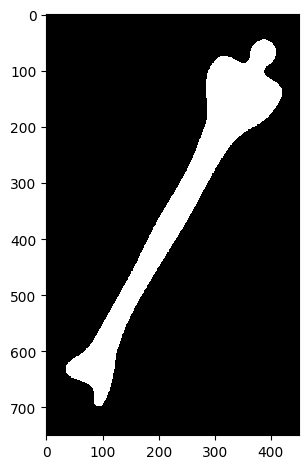

In [28]:
imshow(img_as_float(f_skel))

In [29]:
morphology.disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

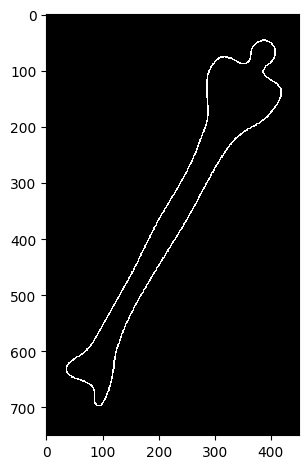

In [30]:
f_se8 = morphology.disk(3)
g_skel = img_as_bool(img_as_float(f_skel) - img_as_float(morphology.binary_erosion(f_skel,f_se8)))
imshow(img_as_float(g_skel),cmap='gray')

#### Question 6

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


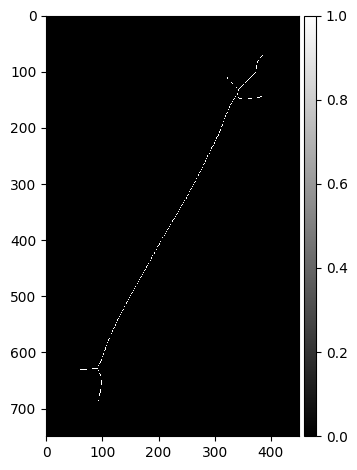

In [31]:
j_skel = morphology.skeletonize(f_skel)
imshow(img_as_float(j_skel),cmap='gray')